In [1]:
from introduction_to_ml_with_python import mglearn

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [3]:
X,y = mglearn.datasets.make_forge()

X.shape: (26, 2)


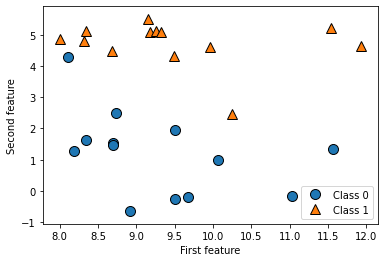

In [6]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

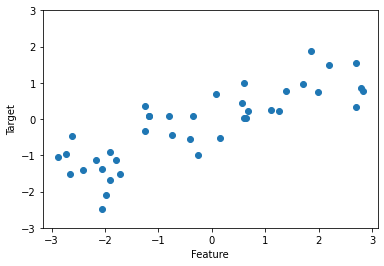

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
cancer.data.shape

(569, 30)

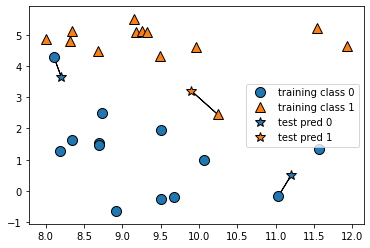

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

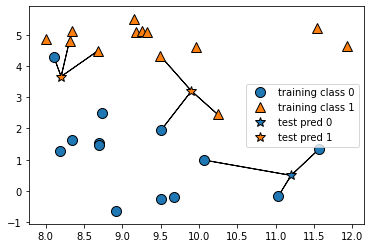

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [16]:
clf.score(X_test, y_test)

0.8571428571428571

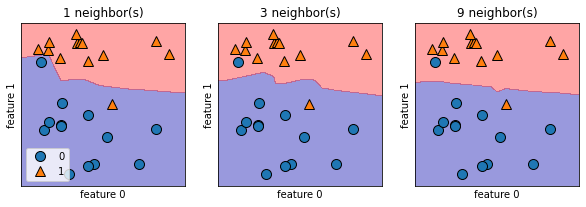

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5,ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

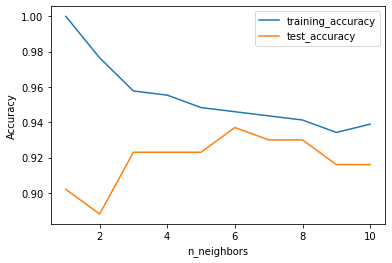

In [20]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf  = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

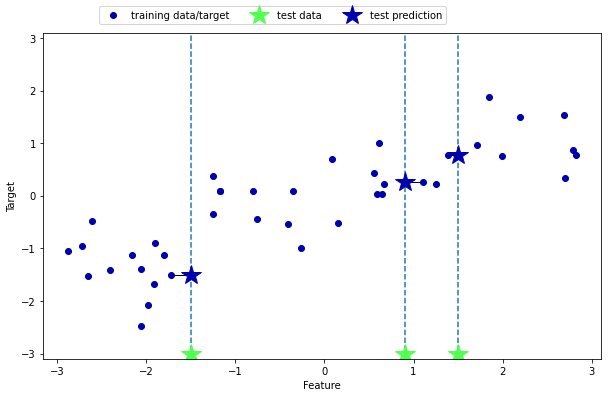

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

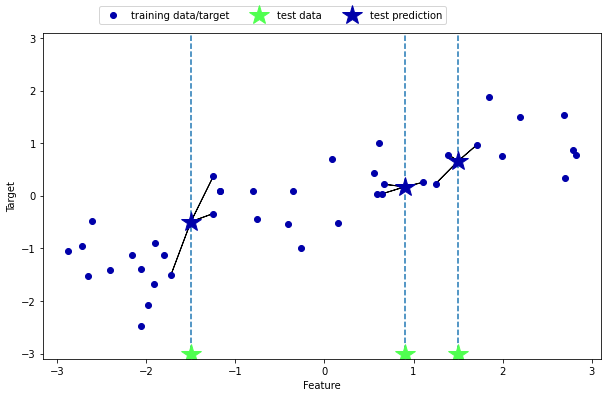

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [30]:
reg.score(X_test,y_test)

0.8344172446249605

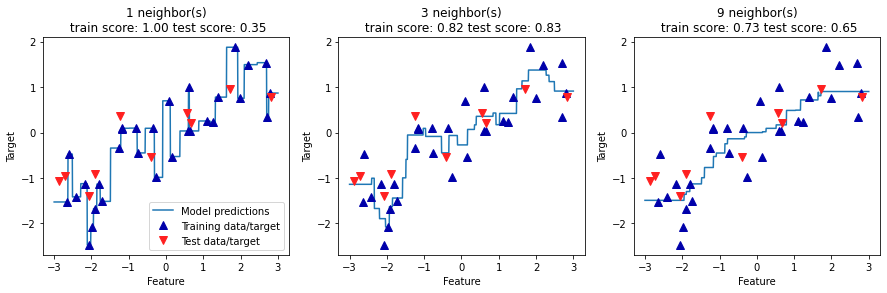

In [37]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


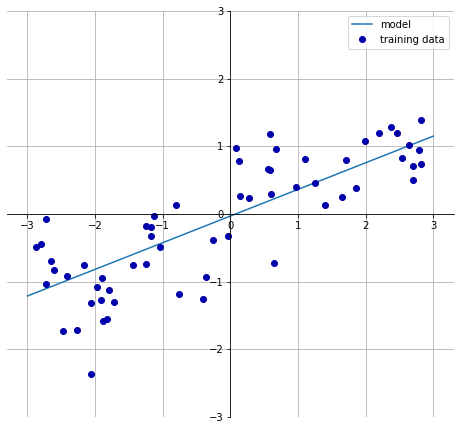

In [38]:
mglearn.plots.plot_linear_regression_wave()

In [39]:
from sklearn.linear_model import LinearRegression

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

In [40]:
lr.coef_

array([0.39390555])

In [41]:
lr.intercept_

-0.031804343026759746

In [42]:
lr.score(X_train, y_train)

0.6700890315075756

In [43]:
lr.score(X_test, y_test)

0.65933685968637

In [44]:
X,y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [45]:
lr.score(X_train,y_train)

0.952051960903273

In [46]:
lr.score(X_test,y_test)

0.6074721959665708

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('training score: {}'.format(ridge.score(X_train, y_train)))
print('test score: {}'.format(ridge.score(X_test, y_test)))

training score: 0.885796658517094
test score: 0.7527683481744755


In [49]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('training score: {}'.format(ridge10.score(X_train, y_train)))
print('test score: {}'.format(ridge10.score(X_test, y_test)))

training score: 0.7882787115369614
test score: 0.635941148917731


In [50]:
ridge01 = Ridge(alpha=.1).fit(X_train,y_train)
print('training score: {}'.format(ridge01.score(X_train, y_train)))
print('test score: {}'.format(ridge01.score(X_test, y_test)))

training score: 0.9282273685001985
test score: 0.772206793647982


In [51]:
X = np.array([[0,1,0,1],[1,0,1,1],[0,0,0,1],[1,0,1,0]])
y = np.array([0,1,0,1])

In [57]:
counts = {}

for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print('feature counts:\n{}'.format(counts))

feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


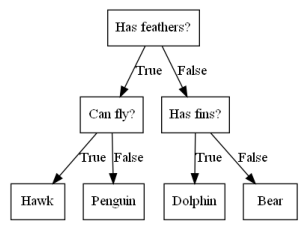

In [4]:
mglearn.plots.plot_animal_tree()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print('accuracy on training set:{:.3f}'.format(tree.score(X_train,y_train)))
print('accuray on test set: {:.3f}'.format(tree.score(X_test,y_test)))

accuracy on training set:1.000
accuray on test set: 0.937


In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)
print('accuracy on training set:{:.3f}'.format(tree.score(X_train,y_train)))
print('accuray on test set: {:.3f}'.format(tree.score(X_test,y_test)))

accuracy on training set:0.988
accuray on test set: 0.951


In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

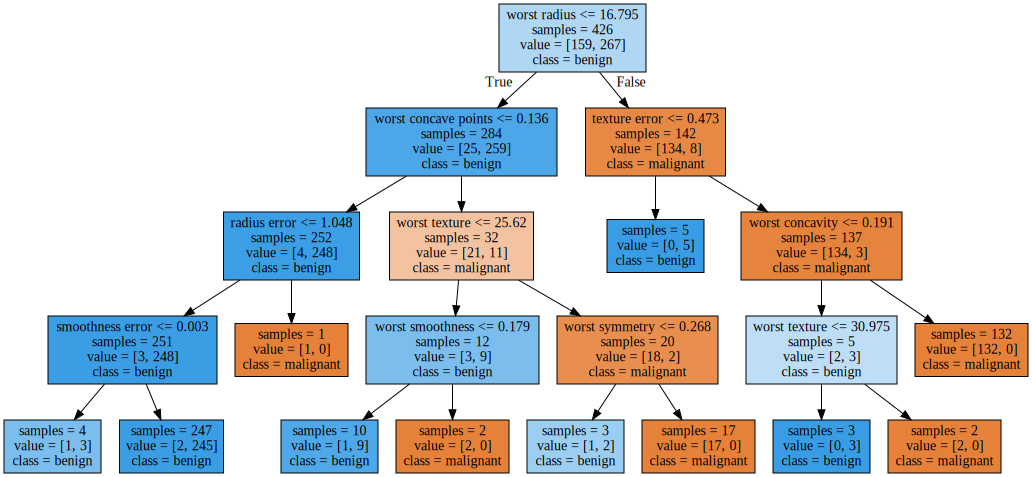

In [9]:
import graphviz

with open('tree.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [10]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

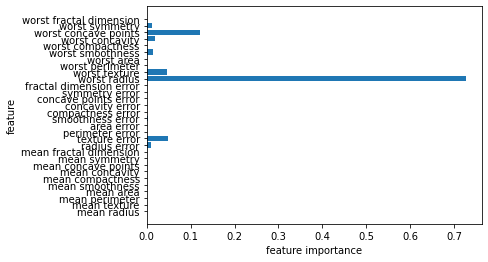

In [13]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


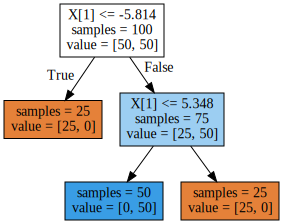

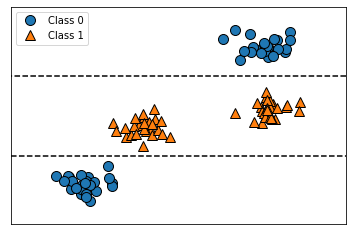

In [14]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'price in $/Mbyte')

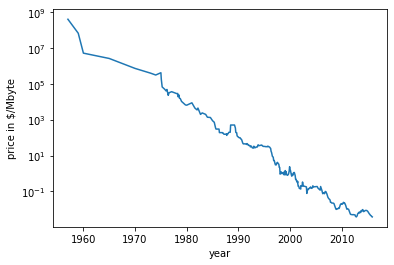

In [15]:
ram_prices = pd.read_csv('introduction_to_ml_with_python/data/ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price in $/Mbyte')

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

X_train = data_train.date[:,np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-22-bece680c17b5>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:,np.newaxis]
<ipython-input-22-bece680c17b5>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


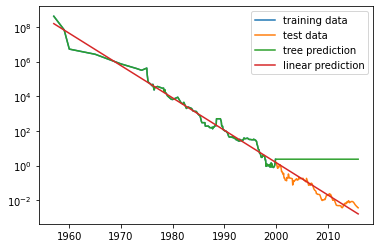

In [25]:
plt.semilogy(data_train.date,data_train.price, label = 'training data')
plt.semilogy(data_test.date, data_test.price, label = 'test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='linear prediction')
plt.legend()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

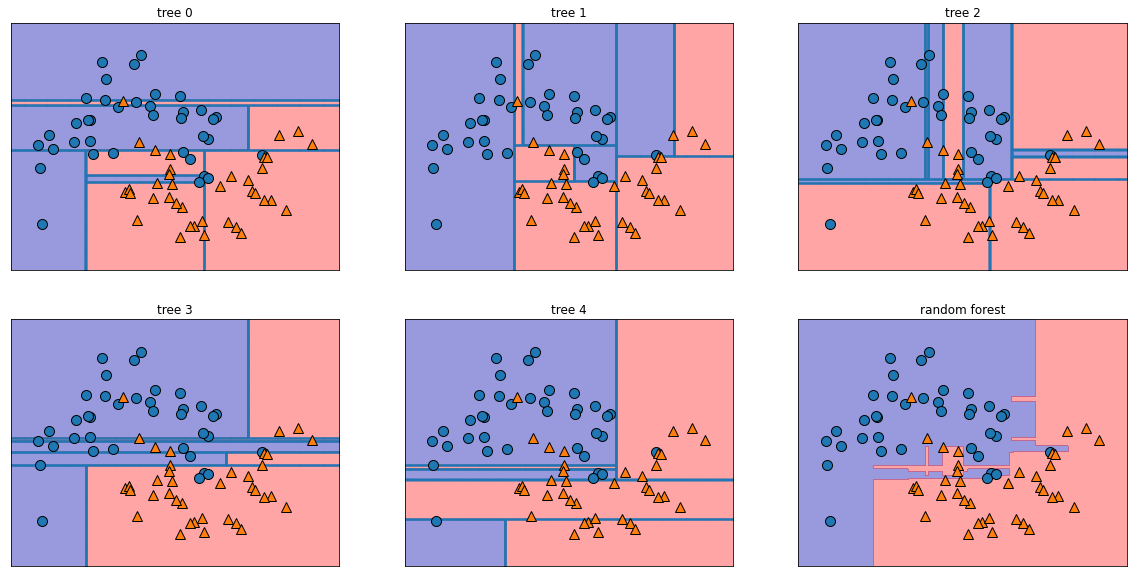

In [27]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)
print('accuracy on training set: {:.2f}'.format(forest.score(X_train,y_train)))
print('accuracy on test set: {:.2f}'.format(forest.score(X_test,y_test)))

accuracy on training set: 1.00
accuracy on test set: 0.97


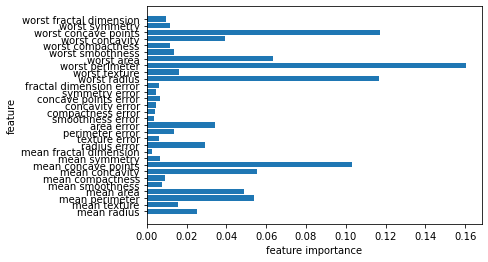

In [29]:
plot_feature_importances_cancer(forest)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print('accuracy on training set: {:.2f}'.format(gbrt.score(X_train,y_train)))
print('accuracy on test set: {:.2f}'.format(gbrt.score(X_test,y_test)))

accuracy on training set: 1.00
accuracy on test set: 0.97


In [31]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

print('accuracy on training set: {:.2f}'.format(gbrt.score(X_train,y_train)))
print('accuracy on test set: {:.2f}'.format(gbrt.score(X_test,y_test)))

accuracy on training set: 0.99
accuracy on test set: 0.97


In [32]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=.01)
gbrt.fit(X_train,y_train)

print('accuracy on training set: {:.2f}'.format(gbrt.score(X_train,y_train)))
print('accuracy on test set: {:.2f}'.format(gbrt.score(X_test,y_test)))

accuracy on training set: 0.99
accuracy on test set: 0.97


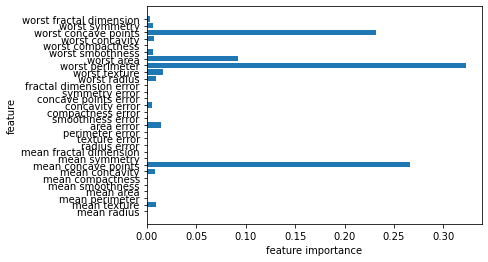

In [33]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'feature 1')

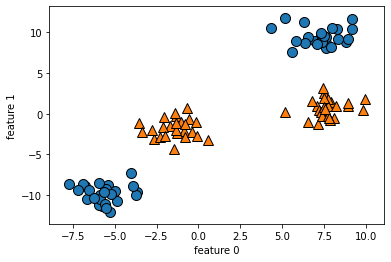

In [34]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers=4,random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

D:\Software\anaconda\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

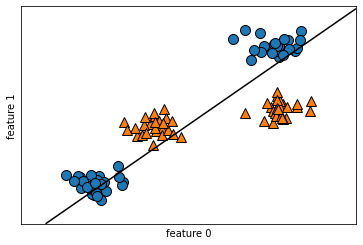

In [35]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5, 0, 'feature1**2')

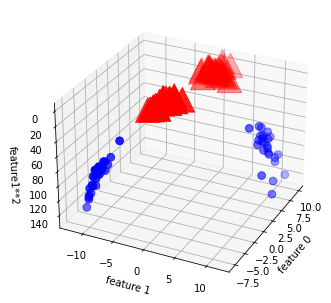

In [36]:
X_new = np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

ax = Axes3D(figure, elev=-152,azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=600)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1**2')


Text(0.5, 0, 'feature1**2')

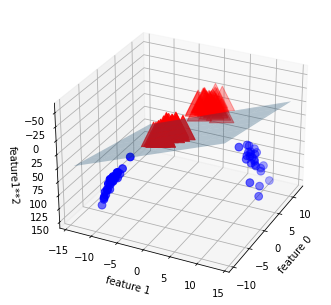

In [38]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2, X[:,1].max()+2,50)
XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ, rstride=8,cstride=8,alpha=.3)
ax.scatter(X_new[mask, 0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=600)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1**2')

Text(0, 0.5, 'feature 1')

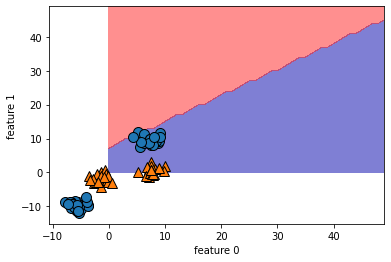

In [39]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),XX.ravel()])
plt.contourf(XX<YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

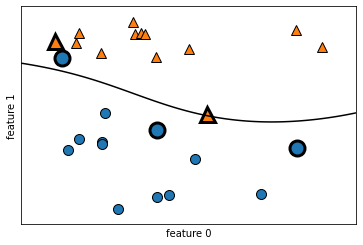

In [42]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

sv = svm.support_vectors_

sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

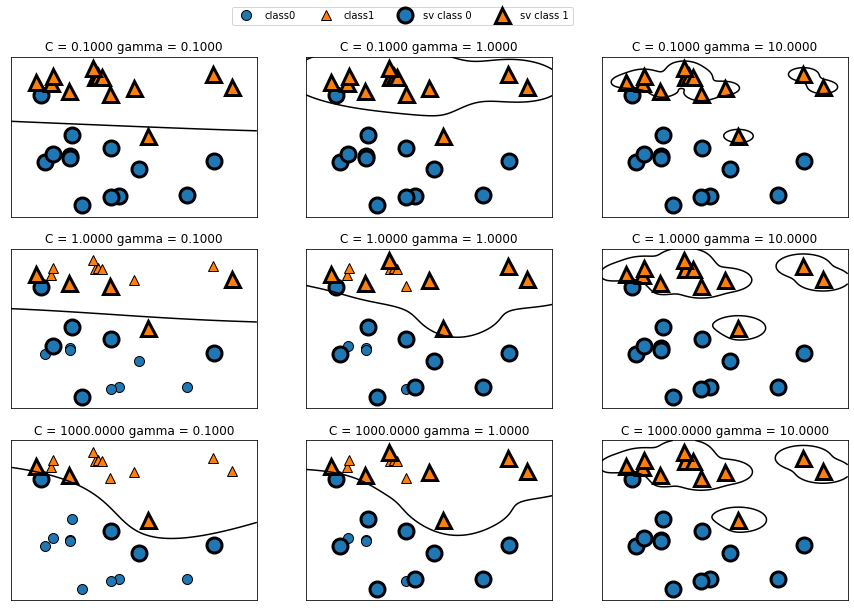

In [44]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
        
axes[0,0].legend(['class0','class1','sv class 0','sv class 1'],ncol=4,loc=(.9,1.2))

In [48]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svc = SVC()
svc.fit(X_train,y_train)

print('accuracy on training set: {:.2f}'.format(svc.score(X_train,y_train)))
print('accuracy on test set: {:.2f}'.format(svc.score(X_test,y_test)))

accuracy on training set: 0.90
accuracy on test set: 0.94


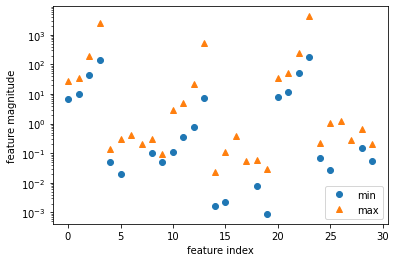

In [47]:
plt.plot(X_train.min(axis=0), 'o',label='min')
plt.plot(X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')

In [49]:
min_on_training = X_train.min(axis=0)
min_on_training

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.628e-01,
       7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [63]:
range_on_training = (X_train-min_on_training).max(axis=0)

In [64]:
X_train_scaled = (X_train - min_on_training)/range_on_training

print('minimum for each feature\n{}'.format(X_train_scaled.min(axis=0)))
print('maximum for each feature\n{}'.format(X_train_scaled.max(axis=0)))

minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [65]:
X_test_scaled = (X_test - min_on_training)/range_on_training

In [66]:
svc = SVC().fit(X_train_scaled, y_train)
print('accuracy on training set: {:.2f}'.format(svc.score(X_train_scaled,y_train)))
print('accuracy on test set: {:.2f}'.format(svc.score(X_test_scaled,y_test)))

accuracy on training set: 0.98
accuracy on test set: 0.97


In [68]:
svc = SVC(C=1000).fit(X_train_scaled, y_train)
print('accuracy on training set: {:.2f}'.format(svc.score(X_train_scaled,y_train)))
print('accuracy on test set: {:.2f}'.format(svc.score(X_test_scaled,y_test)))

accuracy on training set: 1.00
accuracy on test set: 0.96


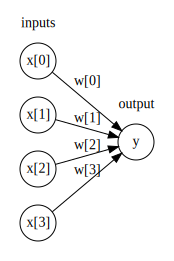

In [69]:
display(mglearn.plots.plot_logistic_regression_graph())

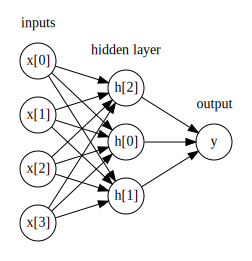

In [70]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

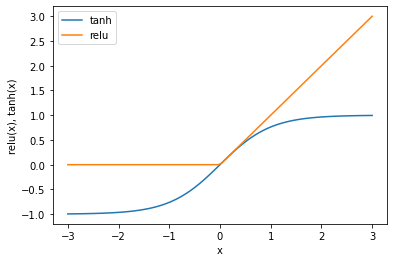

In [71]:
line=np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

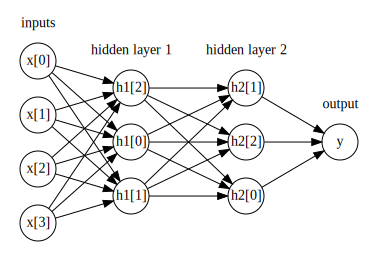

In [72]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'feature 1')

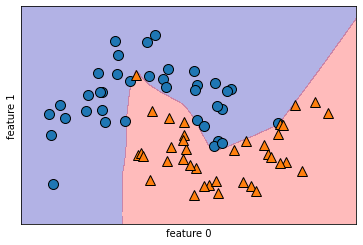

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

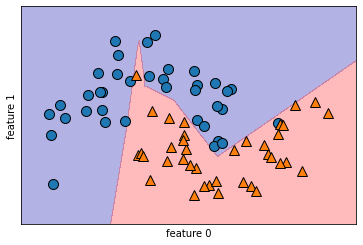

In [77]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10],max_iter=1000).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

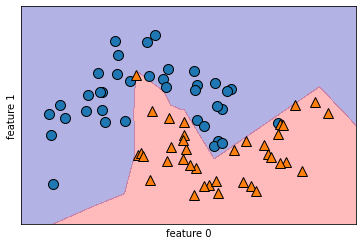

In [78]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

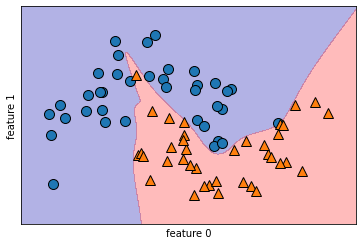

In [79]:
mlp = MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

D:\Software\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Software\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


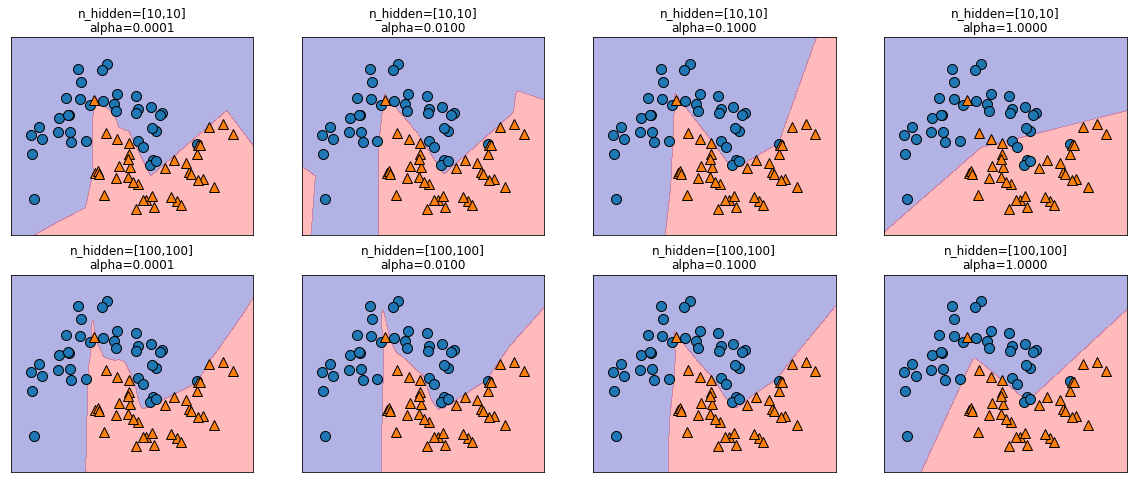

In [80]:
fig,axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax , alpha in zip(axx,[.0001,.01,.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train,fill=True,alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha))

In [81]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print('accuracy on training set:{:.2f}'.format(mlp.score(X_train,y_train)))
print('accuracy on test set:{:.2f}'.format(mlp.score(X_test,y_test)))

accuracy on training set:0.94
accuracy on test set:0.92


In [83]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train-mean_on_train)/std_on_train
X_test_scaled = (X_test-mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)
print('accuracy on training set:{:.2f}'.format(mlp.score(X_train_scaled,y_train)))
print('accuracy on test set:{:.2f}'.format(mlp.score(X_test_scaled,y_test)))

accuracy on training set:0.99
accuracy on test set:0.97


D:\Software\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [87]:
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled,y_train)
print('accuracy on training set:{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('accuracy on test set:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

accuracy on training set:1.000
accuracy on test set:0.972


In [86]:
mlp = MLPClassifier(random_state=0, max_iter=1000,alpha=1)
mlp.fit(X_train_scaled,y_train)
print('accuracy on training set:{:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('accuracy on test set:{:.3f}'.format(mlp.score(X_test_scaled,y_test)))

accuracy on training set:0.988
accuracy on test set:0.972


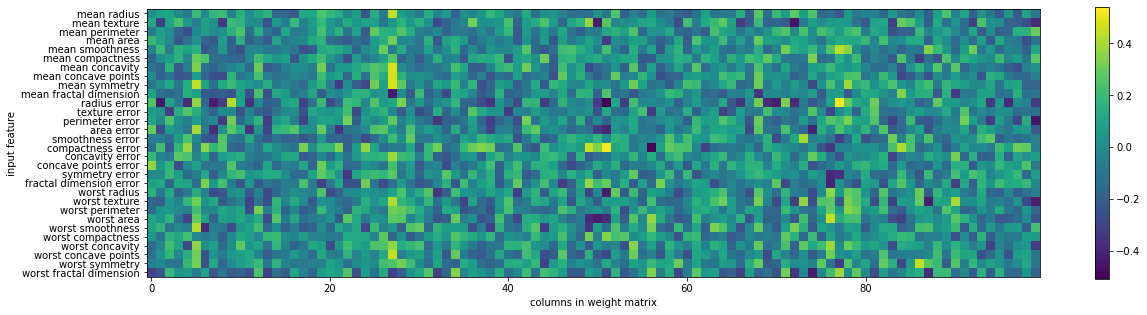

In [88]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('columns in weight matrix')
plt.ylabel('input feature')
plt.colorbar()

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,y = make_circles(noise=.25,factor=.5,random_state=1)

y_named = np.array(['blue','red'])[y]

X_train,X_test,y_train_named,y_test_named,y_train,y_test = train_test_split(X,y_named,y,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

In [93]:
gbrt.decision_function(X_test).shape

(25,)

In [94]:
X_test.shape

(25, 2)

In [95]:
gbrt.decision_function(X_test)[:6]

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

In [96]:
print("Thresholded decision function:\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [98]:
greater_zero = (gbrt.decision_function(X_test)>0).astype(int)

pred = gbrt.classes_[greater_zero]
print('pred is equal to predictions:{}'.format(np.all(pred==gbrt.predict(X_test))))

pred is equal to predictions:True


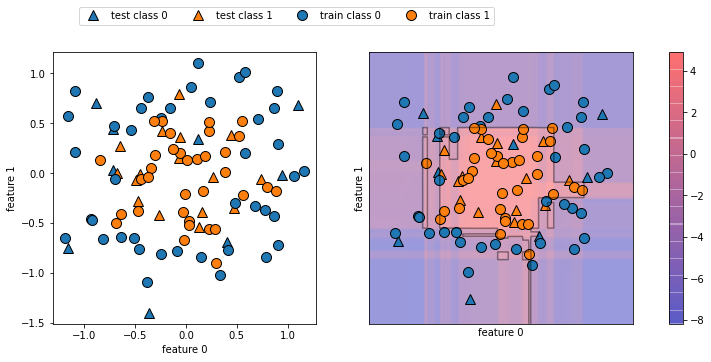

In [104]:
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax==axes[0],alpha=.4,cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['test class 0','test class 1','train class 0','train class 1'], ncol=4, loc = (.1,1.1))

In [105]:
gbrt.predict_proba(X_test)[:6]

array([[0.01573626, 0.98426374],
       [0.84575653, 0.15424347],
       [0.98112869, 0.01887131],
       [0.97407033, 0.02592967],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

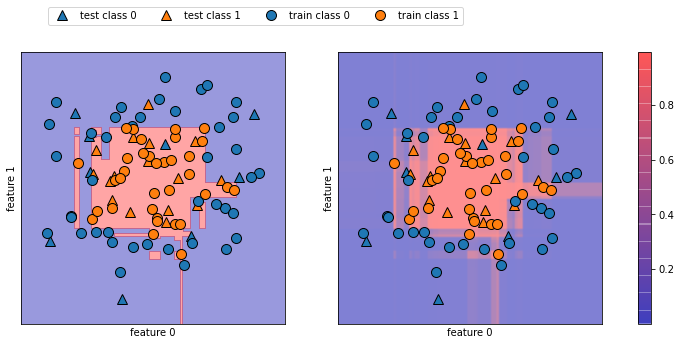

In [107]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha = .4, fill=True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1], alpha=.5,cm=mglearn.ReBl,function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
cbar = plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['test class 0','test class 1','train class 0','train class 1'], ncol=4, loc = (.1,1.1))

In [108]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [109]:
gbrt.decision_function(X_test).shape

(38, 3)

In [111]:
gbrt.predict_proba(X_test)[:6]

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108]])